## Assignment 3: Evaluating and extending an RNN based POS tagger

In [1]:
# Downloading  Polish, Swedish and English datasets

!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-dev.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-test.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-train.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-LinES/master/sv_lines-ud-test.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-LinES/master/sv_lines-ud-train.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_Swedish-LinES/master/sv_lines-ud-dev.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-dev.conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu

--2021-05-19 21:47:00--  https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-dev.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1483872 (1.4M) [text/plain]
Saving to: ‘pl_lfg-ud-dev.conllu’

pl_lfg-ud-dev.conll 100%[===================>]   1.42M  --.-KB/s    in 0.06s   

2021-05-19 21:47:01 (23.5 MB/s) - ‘pl_lfg-ud-dev.conllu’ saved [1483872/1483872]

--2021-05-19 21:47:01--  https://raw.githubusercontent.com/UniversalDependencies/UD_Polish-LFG/master/pl_lfg-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [3]:
# Our standard imports for maths and basic methodology
import numpy as np
from sklearn.model_selection import train_test_split

# For user feedback
from tqdm import tqdm
import matplotlib.pyplot as plt

# Imports for pytorch
import torch
import torch.nn as nn

In [3]:
if torch.cuda.is_available():
  for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))
else:
  print("No GPU available")

Tesla T4


In [6]:
def baseline(y_train, X_train, y_test, X_test):
  majority = {} #creating dictionary with tag/word tuples as keys and frequency as value
  for i, l in enumerate(y_train):
    for n, tag in enumerate(l):
      if (tag, X_train[i][n]) not in majority.keys():
        majority[(tag, X_train[i][n])] = 1
      else:
        majority[(tag, X_train[i][n])] += 1

  tag = []   # creating two input lists for the baseline model
  for t in y_test:
    for i in t:
      tag.append(i)

  tok = []
  for t in X_test:
    for i in t:
      tok.append(i)

  final = []        # The most-frequent-tag baseline model - assigning the most freqent pos tag for a given token 
  num_correct = 0
  for i, s in enumerate(tok):
      pos_final = ''
      count_final = 0
      for pos in tags:
          key = (pos, s)
          if key in majority:
              count = majority[key]
              if count > count_final:
                  count_final = count
                  pos_final = pos
      if tag[i] == pos_final: 
        num_correct += 1
                  
  print('Baseline accuracy:', num_correct/len(tok)*100)

In [ ]:
##Polish tagger##

In [106]:
import re #loading Polish dataset - parsing the conllu files

sentences = []
sentence = []
n = 0
for file in ['/content/pl_lfg-ud-dev.conllu', '/content/pl_lfg-ud-train.conllu', '/content/pl_lfg-ud-test.conllu']:
  data_file = open(file, "r", encoding="utf-8")
  for sent in data_file:
    if sent[0].isdigit():
        if sent[0] == '1' and sent[1] not in ("0123456789") and len(sentence) != 0:
          sentences.append(sentence)
          sentence = []
        s = sent.split()
        Xy = (s[1], s[3])
        sentence.append(Xy)

X = [[token for token, tag in sentence] for sentence in sentences]
y = [[tag for token, tag in sentence] for sentence in sentences]

assert len(X) == len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)
assert len(X_train)+len(X_test) == len(X)

print("The training set includes %i sentences" % len(X_train))
print("The test set includes %i sentences" % len(X_test))

tokens = {token for sentence in X_train for token in sentence}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for tags in y_train for tag in tags}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(idx2token[:15])
print(idx2tag)

The training set includes 15520 sentences
The test set includes 1725 sentences
['<UNK>', 'słownik', 'zdrowym', 'Dusznik', 'identyfikatory', 'pamiętać', 'ścieżce', 'orła', 'samoloty', 'Blondyny', 'żarówkami', 'trunku', 'sprzedawać', 'pojawi', 'gość']
['VERB', 'CCONJ', 'ADJ', 'PUNCT', 'PROPN', 'SCONJ', 'PART', 'NUM', 'AUX', 'ADP', 'PRON', 'DET', 'INTJ', 'ADV', 'NOUN', '<PAD>']


In [86]:
baseline(y_train, X_train, y_test, X_test)

Baseline accuracy: 79.70903522205207


In [107]:
class PolishTagger(nn.Module): #to activate dropout the number of layers must be larger than 1
  def __init__(self, word_embedding_dim, hidden_dim, vocabulary_size, tagset_size, n_layers, mode, bidirectional = False, dropout = 0):

    super(PolishTagger, self).__init__()                                         
    self.hidden_dim_ = hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size
    self.mode = mode
    self.bidirectional = bidirectional
    self.dropout = dropout

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,         
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    
    if mode == 'GRU':
      self._gru = nn.GRU(input_size=word_embedding_dim,                         
                          hidden_size=hidden_dim,                          
                          batch_first=True, 
                          num_layers = n_layers, 
                          bidirectional = bidirectional,
                          dropout = dropout if n_layers > 1 else 0)
    elif mode == 'LSTM':
        self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=hidden_dim,
                         batch_first=True, 
                         num_layers = n_layers, 
                         bidirectional = bidirectional,
                         dropout = dropout if n_layers > 1 else 0)
    
    self._fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, tagset_size)                          
    self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                                
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                               
      self.cuda()
  
  
  def pad_and_encode(self, sentences, labels):
    assert len(sentences)==len(labels)
    assert np.all([len(sentence)==len(tags) for sentence, tags in zip(sentences, labels)])
    max_sentence_length = np.max([len(sentence) for sentence in sentences]) 
    padded_sentences = torch.zeros(len(sentences), max_sentence_length,     
                                  dtype=torch.long)
    padded_sentences[:] = token2idx['<PAD>']
    padded_labels = torch.zeros(len(sentences), max_sentence_length, 
                                dtype=torch.long)
    padded_labels[:] = tag2idx['<PAD>']
    for i, (sentence, tags) in enumerate(zip(sentences, labels)):               
      for j, token in enumerate(sentence):
        if token in token2idx.keys():
          padded_sentences[i, j] = token2idx[token]
        else:
          padded_sentences[i, j] = token2idx['<UNK>']
      for j, tag in enumerate(tags):
        padded_labels[i, j] = tag2idx[tag]
    return padded_sentences, padded_labels


  def batch_iterator(self, sentences, labels, batch_size=64):
    assert len(sentences) == len(labels)
    for i in range(0, len(sentences), batch_size):
      X, y = self.pad_and_encode(sentences[i:min(i+batch_size, len(sentences))], 
                            labels[i:min(i+batch_size, len(sentences))])
      if torch.cuda.is_available():                                               
         yield (X.cuda(), y.cuda())
      else:
        yield (X, y)


  def fit(self, sent, lab):

      self.sent = sent
      self.lab = lab
      loss_function = nn.NLLLoss(ignore_index=tag2idx['<PAD>'])                       
                                                                                  
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01)                                

      batch_size = 256                                                                               
      for epoch in range(5):                                                          
        with tqdm(self.batch_iterator(sent, lab, batch_size=256), 
                  total=len(sent)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
          for inputs, targets in batches:                                             
            model.zero_grad()                                                         
            scores = model(inputs)                                                    
            loss = loss_function(scores.view(-1, model.tagset_size_),                 
                                targets.view(-1))               
            loss.backward()                                                          
            optimizer.step()                                                          
            predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
            mask = targets!=tag2idx['<PAD>']                                          
            correct = (predictions[mask] == targets[mask]).sum().item()               
            accuracy = correct / mask.sum().item()*100
            model.training_accuracy_.append(accuracy)                                
            model.training_loss_.append(loss.item())                                 
            batches.set_postfix(loss=loss.item(), accuracy=accuracy)                 


  def forward(self, padded_sentences):
      batch_size, max_sentence_length = padded_sentences.size()

      embedded_sentences = self._word_embedding(padded_sentences)                   

      sentence_lengths = (padded_sentences != token2idx['<PAD>']).sum(dim=1)        
      sentence_lengths = sentence_lengths.long().cpu()                            
      X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                            batch_first=True, enforce_sorted=False)
      if self.mode == 'GRU':
        gru_out, _ = self._gru(X)                                                 
        X, _ = nn.utils.rnn.pad_packed_sequence(gru_out, batch_first=True)         
      
      elif self.mode == 'LSTM':
        lstm_out, _ = self._lstm(X)                                                 
        X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

      X = X.contiguous().view(-1, X.shape[2])                                     
      tag_space = self._fc(X)                                                    
      tag_scores = self._softmax(tag_space)                                       
      return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)

      

  def predict(self, X_test, y_test, batch_size=256):
    preds = []
    with torch.no_grad():                                                           
      for inputs, targets in self.batch_iterator(X_test, y_test, batch_size): 
        scores = model(inputs)                                                      
        predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  
        mask = targets!=tag2idx['<PAD>']                                            
        preds += predictions[mask]                                                   
    return preds

  def score(self,X_test, y_test, batch_size=256):
    with torch.no_grad():                                                          
      n_correct = 0
      n_total = 0
      for inputs, targets in self.batch_iterator(X_test, y_test, batch_size):
        scores = model(inputs)                                                      
        predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
        mask = targets!=tag2idx['<PAD>']                                            
        n_correct += (predictions[mask] == targets[mask]).sum().item()             
        n_total += mask.sum().item()
      print("Test accuracy %.1f%%" % (100*n_correct/n_total))




In [116]:
model = PolishTagger(word_embedding_dim=96,                                      
                   hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,
                   n_layers = 1, mode = 'LSTM', bidirectional = True)                        
print(model)


PolishTagger(
  (_word_embedding): Embedding(30570, 96, padding_idx=30569)
  (_lstm): LSTM(96, 64, batch_first=True, bidirectional=True)
  (_fc): Linear(in_features=128, out_features=15, bias=True)
  (_softmax): LogSoftmax(dim=1)
)


In [117]:
model.fit(X_train, y_train)

Epoch 4: 100%|██████████| 61/61 [00:01<00:00, 35.77batch/s, accuracy=99.8, loss=0.00992]


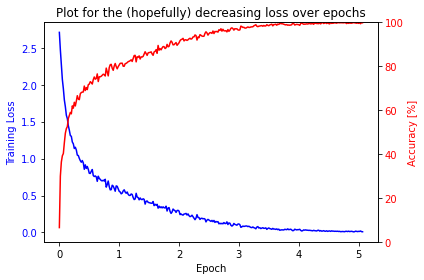

In [118]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model.training_accuracy_), len(X_train)//257)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

In [119]:
model.score(X_test, y_test)

Test accuracy 88.5%


In [ ]:
##English tagger##

In [4]:
import re  #loading English dataset

sentences = []
sentence = []
n = 0
for file in ['/content/en_ewt-ud-train.conllu', '/content/en_ewt-ud-test.conllu', '/content/en_ewt-ud-dev.conllu']:
  data_file = open(file, "r", encoding="utf-8")
  for sent in data_file:
    if sent[0].isdigit():
        if sent[0] == '1' and sent[1] not in ("0123456789") and len(sentence) != 0:
          sentences.append(sentence)
          sentence = []
        s = sent.split()
        Xy = (s[1], s[3])
        sentence.append(Xy)


X = [[token for token, tag in sentence] for sentence in sentences]
y = [[tag for token, tag in sentence] for sentence in sentences]

assert len(X) == len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)
assert len(X_train)+len(X_test) == len(X)

print("The training set includes %i sentences" % len(X_train))
print("The test set includes %i sentences" % len(X_test))

tokens = {token for sentence in X_train for token in sentence}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for tags in y_train for tag in tags}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(idx2token[:15])
print(idx2tag)

The training set includes 15575 sentences
The test set includes 1731 sentences
['<UNK>', 'Beavers', 'Mills', 'PA', 'pitch', 'unfriendly', 'Delainey', 'apologize', 'http://www.bbc.co.uk/news', 'journalists', 'alliance', 'sheeting', 'Zionist', 'godsend', 'Atal']
['ADJ', 'PRON', 'SCONJ', 'NOUN', 'PUNCT', 'ADV', 'AUX', '_', 'SYM', 'NUM', 'DET', 'PROPN', 'X', 'INTJ', 'CCONJ', 'PART', 'VERB', 'ADP', '<PAD>']


In [7]:
baseline(y_train, X_train, y_test, X_test)

Baseline accuracy: 86.67744792268299


In [8]:
class EnglishTagger(nn.Module):
  def __init__(self, word_embedding_dim, hidden_dim, vocabulary_size, tagset_size, n_layers, mode, bidirectional = False, dropout = 0):

    super(EnglishTagger, self).__init__()                                          
    self.hidden_dim_ = hidden_dim                                    
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size
    self.mode = mode
    self.bidirectional = bidirectional
    self.dropout = dropout

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,         
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    
    if mode == 'GRU':
      self._gru = nn.GRU(input_size=word_embedding_dim,                         
                          hidden_size=hidden_dim,                           
                          batch_first=True, 
                          num_layers = n_layers, 
                          bidirectional = bidirectional,
                          dropout = dropout if n_layers > 1 else 0)
    elif mode == 'LSTM':
        self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=hidden_dim,
                         batch_first=True, 
                         num_layers = n_layers, 
                         bidirectional = bidirectional,
                         dropout = dropout if n_layers > 1 else 0)
    
    self._fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, tagset_size)                         
    self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                               
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                               
      self.cuda()
  
  
  def pad_and_encode(self, sentences, labels):
    assert len(sentences)==len(labels)
    assert np.all([len(sentence)==len(tags) for sentence, tags in zip(sentences, labels)])
    max_sentence_length = np.max([len(sentence) for sentence in sentences]) 
    padded_sentences = torch.zeros(len(sentences), max_sentence_length,     
                                  dtype=torch.long)
    padded_sentences[:] = token2idx['<PAD>']
    padded_labels = torch.zeros(len(sentences), max_sentence_length, 
                                dtype=torch.long)
    padded_labels[:] = tag2idx['<PAD>']
    for i, (sentence, tags) in enumerate(zip(sentences, labels)):               
      for j, token in enumerate(sentence):
        if token in token2idx.keys():
          padded_sentences[i, j] = token2idx[token]
        else:
          padded_sentences[i, j] = token2idx['<UNK>']
      for j, tag in enumerate(tags):
        padded_labels[i, j] = tag2idx[tag]
    return padded_sentences, padded_labels


  def batch_iterator(self, sentences, labels, batch_size=64):
    assert len(sentences) == len(labels)
    for i in range(0, len(sentences), batch_size):
      X, y = self.pad_and_encode(sentences[i:min(i+batch_size, len(sentences))], 
                            labels[i:min(i+batch_size, len(sentences))])
      if torch.cuda.is_available():                                              
         yield (X.cuda(), y.cuda())
      else:
        yield (X, y)
 

  def fit(self, sent, lab):

      self.sent = sent
      self.lab = lab
      loss_function = nn.NLLLoss(ignore_index=tag2idx['<PAD>'])                      
                                                                                  
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01)                               

      batch_size = 256                                                                               
      for epoch in range(5):                                                          
        with tqdm(self.batch_iterator(sent, lab, batch_size=256), 
                  total=len(sent)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
          for inputs, targets in batches:                                            
            model.zero_grad()                                                         
            scores = model(inputs)                                                   
            loss = loss_function(scores.view(-1, model.tagset_size_),                 
                                targets.view(-1))               
            loss.backward()                                                           
            optimizer.step()                                                          
            predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
            mask = targets!=tag2idx['<PAD>']                                          
            correct = (predictions[mask] == targets[mask]).sum().item()               
            accuracy = correct / mask.sum().item()*100
            model.training_accuracy_.append(accuracy)                                 
            model.training_loss_.append(loss.item())                                  
            batches.set_postfix(loss=loss.item(), accuracy=accuracy)                  


  def forward(self, padded_sentences):
      batch_size, max_sentence_length = padded_sentences.size()

      embedded_sentences = self._word_embedding(padded_sentences)                    

      sentence_lengths = (padded_sentences != token2idx['<PAD>']).sum(dim=1)        
      sentence_lengths = sentence_lengths.long().cpu()                           
      X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths,
                                            batch_first=True, enforce_sorted=False)
      if self.mode == 'GRU':
        gru_out, _ = self._gru(X)                                                 
        X, _ = nn.utils.rnn.pad_packed_sequence(gru_out, batch_first=True)         
      
      elif self.mode == 'LSTM':
        lstm_out, _ = self._lstm(X)                                                 
        X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

      X = X.contiguous().view(-1, X.shape[2])                                     
      tag_space = self._fc(X)                                                     
      tag_scores = self._softmax(tag_space)                                       
      return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)

      

  def predict(self, X_test, y_test, batch_size=256):
    preds = []
    with torch.no_grad():                                                           
      for inputs, targets in self.batch_iterator(X_test, y_test, batch_size): 
        scores = model(inputs)                                                      
        predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  
        mask = targets!=tag2idx['<PAD>']                                            
        preds += predictions[mask]                                                   
    return preds

  def score(self,X_test, y_test, batch_size=256):
    with torch.no_grad():                                                           
      n_correct = 0
      n_total = 0
      for inputs, targets in self.batch_iterator(X_test, y_test, batch_size): 
        scores = model(inputs)                                                      
        predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  
        mask = targets!=tag2idx['<PAD>']                                            
        n_correct += (predictions[mask] == targets[mask]).sum().item()              
        n_total += mask.sum().item()
      print("Test accuracy %.1f%%" % (100*n_correct/n_total))




In [9]:
model = EnglishTagger(word_embedding_dim=32,                                       
                   hidden_dim=64,                                         
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,
                   n_layers = 2, mode = 'GRU', bidirectional = True, dropout = 0.2)                                  
print(model)

EnglishTagger(
  (_word_embedding): Embedding(22388, 32, padding_idx=22387)
  (_gru): GRU(32, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (_fc): Linear(in_features=128, out_features=18, bias=True)
  (_softmax): LogSoftmax(dim=1)
)


In [11]:
model.fit(X_train, y_train)

Epoch 4: 100%|██████████| 61/61 [00:49<00:00,  1.24batch/s, accuracy=96.4, loss=0.112]


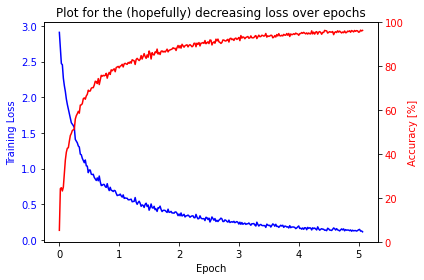

In [13]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model.training_accuracy_), len(X_train)//257)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

In [71]:
model.score(X_test, y_test)

Test accuracy 91.5%


In [ ]:
##Swedish tagger##

In [47]:
import re  #loading Swedish dataset

sentences = []
sentence = []
n = 0
for file in ['/content/sv_lines-ud-train.conllu', '/content/sv_lines-ud-dev.conllu', '/content/sv_lines-ud-test.conllu']:
  data_file = open(file, "r", encoding="utf-8")
  for sent in data_file:
    if sent[0].isdigit():
        if sent[0] == '1' and sent[1] not in ("0123456789") and len(sentence) != 0:
          sentences.append(sentence)
          sentence = []
        s = sent.split()
        Xy = (s[1], s[3])
        sentence.append(Xy)

X = [[token for token, tag in sentence] for sentence in sentences]
y = [[tag for token, tag in sentence] for sentence in sentences]

assert len(X) == len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)
assert len(X_train)+len(X_test) == len(X)

print("The training set includes %i sentences" % len(X_train))
print("The test set includes %i sentences" % len(X_test))

tokens = {token for sentence in X_train for token in sentence}
idx2token = list(tokens)
idx2token.insert(0, '<UNK>')
idx2token.append('<PAD>')
token2idx = {token:idx for idx, token in enumerate(idx2token)}

tags = {tag for tags in y_train for tag in tags}
idx2tag = list(tags)
idx2tag.append('<PAD>')
tag2idx = {tag:idx for idx, tag in enumerate(idx2tag)}

print(idx2token[:15])
print(idx2tag)

The training set includes 4717 sentences
The test set includes 525 sentences
['<UNK>', 'kolonialministerns', 'gytter', 'genomförbart', 'La', 'tändes', 'likhetstecken', 'utgöra', 'låta', 'omelett', 'anlända', 'köpman', 'barbariskt', 'pivottabellens', 'ilska']
['VERB', 'CCONJ', 'ADJ', 'PUNCT', 'SCONJ', 'PROPN', 'PART', 'NUM', 'AUX', 'X', 'SYM', 'ADP', 'PRON', 'DET', 'INTJ', 'ADV', 'NOUN', '<PAD>']


In [48]:
baseline(y_train, X_train, y_test, X_test)

Baseline accuracy: 82.5146669734269


In [49]:
class SwedishTagger(nn.Module):
  def __init__(self, word_embedding_dim, hidden_dim, vocabulary_size, tagset_size, n_layers, mode, bidirectional = False, dropout = 0):

    super(SwedishTagger, self).__init__()                                          
    self.hidden_dim_ = hidden_dim                                     
    self.vocabulary_size_ = vocabulary_size
    self.tagset_size_ = tagset_size
    self.mode = mode
    self.dropout = dropout
    self.bidirectional = bidirectional

    self._word_embedding = nn.Embedding(num_embeddings=vocabulary_size,         
                                         embedding_dim=word_embedding_dim, 
                                         padding_idx=token2idx['<PAD>'])
    
    if mode == 'GRU':
      self._gru = nn.GRU(input_size=word_embedding_dim,                        
                          hidden_size=hidden_dim,                           
                          batch_first=True, 
                          num_layers = n_layers, 
                          bidirectional = bidirectional,
                          dropout = dropout if n_layers > 1 else 0)
    elif mode == 'LSTM':
        self._lstm = nn.LSTM(input_size=word_embedding_dim,                         
                         hidden_size=hidden_dim,
                         batch_first=True, 
                         num_layers = n_layers, 
                         bidirectional = bidirectional,
                         dropout = dropout if n_layers > 1 else 0)
    
    self._fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, tagset_size)                         
    self._softmax = nn.LogSoftmax(dim=1)                                        
    
    self.training_loss_ = list()                                               
    self.training_accuracy_ = list()

    if torch.cuda.is_available():                                              
      self.cuda()
  
  
  def pad_and_encode(self, sentences, labels):
    assert len(sentences)==len(labels)
    assert np.all([len(sentence)==len(tags) for sentence, tags in zip(sentences, labels)])
    max_sentence_length = np.max([len(sentence) for sentence in sentences]) 
    padded_sentences = torch.zeros(len(sentences), max_sentence_length,     
                                  dtype=torch.long)
    padded_sentences[:] = token2idx['<PAD>']
    padded_labels = torch.zeros(len(sentences), max_sentence_length, 
                                dtype=torch.long)
    padded_labels[:] = tag2idx['<PAD>']
    for i, (sentence, tags) in enumerate(zip(sentences, labels)):               
      for j, token in enumerate(sentence):
        if token in token2idx.keys():
          padded_sentences[i, j] = token2idx[token]
        else:
          padded_sentences[i, j] = token2idx['<UNK>']
      for j, tag in enumerate(tags):
        padded_labels[i, j] = tag2idx[tag]
    return padded_sentences, padded_labels


  def batch_iterator(self, sentences, labels, batch_size=64):
    assert len(sentences) == len(labels)
    for i in range(0, len(sentences), batch_size):
      X, y = self.pad_and_encode(sentences[i:min(i+batch_size, len(sentences))], 
                            labels[i:min(i+batch_size, len(sentences))])
      if torch.cuda.is_available():                                               
         yield (X.cuda(), y.cuda())
      else:
        yield (X, y)


  def fit(self, sent, lab):

      self.sent = sent
      self.lab = lab
      loss_function = nn.NLLLoss(ignore_index=tag2idx['<PAD>'])                      
                                                                                 
      optimizer = torch.optim.Adam(model.parameters(), lr=0.01)                              

      batch_size = 256                                                                              
      for epoch in range(5):                                                        
        with tqdm(self.batch_iterator(sent, lab, batch_size=256), 
                  total=len(sent)//batch_size+1, unit="batch", desc="Epoch %i" % epoch) as batches:
          for inputs, targets in batches:                                           
            model.zero_grad()                                                     
            scores = model(inputs)                                                   
            loss = loss_function(scores.view(-1, model.tagset_size_),                
                                targets.view(-1))               
            loss.backward()                                                           
            optimizer.step()                                                          
            predictions = scores.argmax(dim=2, keepdim=True).squeeze()                
            mask = targets!=tag2idx['<PAD>']                                          
            correct = (predictions[mask] == targets[mask]).sum().item()               
            accuracy = correct / mask.sum().item()*100
            model.training_accuracy_.append(accuracy)                                 
            model.training_loss_.append(loss.item())                                  
            batches.set_postfix(loss=loss.item(), accuracy=accuracy)                  


  def forward(self, padded_sentences):
      batch_size, max_sentence_length = padded_sentences.size()

      embedded_sentences = self._word_embedding(padded_sentences)                     

      sentence_lengths = (padded_sentences != token2idx['<PAD>']).sum(dim=1)        
      sentence_lengths = sentence_lengths.long().cpu()                            
      X = nn.utils.rnn.pack_padded_sequence(embedded_sentences, sentence_lengths, 
                                            batch_first=True, enforce_sorted=False)
      if self.mode == 'GRU':
        gru_out, _ = self._gru(X)                                                 
        X, _ = nn.utils.rnn.pad_packed_sequence(gru_out, batch_first=True)         
      
      elif self.mode == 'LSTM':
        lstm_out, _ = self._lstm(X)                                                 
        X, _ = nn.utils.rnn.pad_packed_sequence(lstm_out, batch_first=True)         

      X = X.contiguous().view(-1, X.shape[2])                                     
      tag_space = self._fc(X)                                                     
      tag_scores = self._softmax(tag_space)                                       
      return tag_scores.view(batch_size, max_sentence_length, self.tagset_size_)

      

  def predict(self, X_test, y_test, batch_size=256):
    preds = []
    with torch.no_grad():                                                           
      for inputs, targets in self.batch_iterator(X_test, y_test, batch_size): 
        scores = model(inputs)                                                      
        predictions = scores.argmax(dim=2, keepdim=True).squeeze()                  
        mask = targets!=tag2idx['<PAD>']                                            
        preds += predictions[mask]                                                   
    return preds

  def score(self,X_test, y_test, batch_size=256):
    with torch.no_grad():                                                           
      n_correct = 0
      n_total = 0
      for inputs, targets in self.batch_iterator(X_test, y_test, batch_size): 
        scores = model(inputs)                                                      
        predictions = scores.argmax(dim=2, keepdim=True).squeeze()                 
        mask = targets!=tag2idx['<PAD>']                                            
        n_correct += (predictions[mask] == targets[mask]).sum().item()              
        n_total += mask.sum().item()
      print("Test accuracy %.1f%%" % (100*n_correct/n_total))



In [60]:
model = SwedishTagger(word_embedding_dim=64,                                      
                   hidden_dim=64,                                          
                   vocabulary_size=len(token2idx),                              
                   tagset_size=len(tag2idx)-1,
                   n_layers = 2, mode = 'LSTM', bidirectional = True, dropout = 0.2)                                  
print(model)


SwedishTagger(
  (_word_embedding): Embedding(14143, 64, padding_idx=14142)
  (_lstm): LSTM(64, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (_fc): Linear(in_features=128, out_features=17, bias=True)
  (_softmax): LogSoftmax(dim=1)
)


In [61]:
model.fit(X_train, y_train)

Epoch 4: 100%|██████████| 19/19 [00:01<00:00, 14.22batch/s, accuracy=97.7, loss=0.0748]


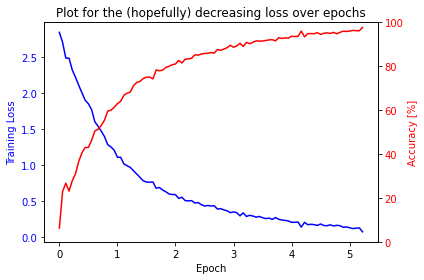

In [62]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
ax.set_title("Plot for the (hopefully) decreasing loss over epochs")
ax.plot(model.training_loss_, 'b-')
ax.set_ylabel("Training Loss", color='b')
ax.set_xlabel("Epoch")
# ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='b')
ax = ax.twinx()
ax.plot(model.training_accuracy_, 'r-')
ax.set_ylabel("Accuracy [%]", color='r')
ax.tick_params(axis='y', labelcolor='r')
a = list(ax.axis())
a[2] = 0
a[3] = 100
ax.axis(a)
t = np.arange(0, len(model.training_accuracy_), len(X_train)//257)
ax.set_xticks(ticks=t)
ax.set_xticklabels(labels=np.arange(len(t)))
fig.tight_layout()
plt.show()

In [63]:
model.score(X_test, y_test)

Test accuracy 89.9%


In this notebook I have included three models with different configurations for three languages (Polish, English, Swedish). 
The baseline tagger for Polish achieved 79.71% accuracy on the test set. Changing model 
to LSTM resulted in a jump in accuracy to 84.1% (with GRU layer - 85.2%). The further fine-tuning 
shown that even higher accuracy can be achieved when the model is bidirectional (LSTM, with 2 layers) - 86.4%. 
On the other hand, using regularisation improved the accuracy only slightly or even worsen the results - 85.1% 
(LSTM, dropout = 0.1), 84.8% (GRU, dropout = 0.1). Setting higher dropout values resulted in drop in accuracy 
on the test set - with dropout rate higher than 0.5 the results dropped even till approx. 30%. 
(I assume that the reson for this may be that the Polish tagger, probably due to morphological complexity, seems not 
to be performing as well as e.g. English tagger, therefore there is not necessary to reduce overfitting. On the other hand, 
using dropout did slighly improve performance of the English dataset.) I also investigated if increasing the number of layers/dimensions
would have impact of the performance of the model - one of best functioning model for Polish was LSTM model,
bidirectional with 1 layers and 96 dimensions which obtained accuracy 88.5%. The reason why the model works better with 
increased number of word embedding dimensions could be that morphological rich languages with many inflectional and derivational forms 
need more dimensions for better word representation - in contrast to e.g English. Therefore, models for less complex languages 
can obtain comparable results although being simpler.

English baseline model obtains 86.67% accuracy, while RNN LSTM model - 88.1% (GRU - Test accuracy 89.8%). Bidirectional model (GRU) 
improved accuracy to 90.8%. In contrast to the Polish tagger, applying regularization (=0.2), resulted in increase of accuracy - 91.5%. 

Swedish baseline model obtains 82.51%, while RNN LSTM model - 84.9%  (GRU - Test accuracy 85.8%). Bidirectional LSTM model achieved 87.2% accuracy. 
Increasing the number of hidden layers to 64 resulted in 89.9% accuracy.  

In the notebook the presented models are tuned to the parameters I found working best for the given datasets. All the taggers obtained approximately
the same results. However, the highest accuracy score achieved the English Tagger, which also is the most simple model. Implementing more extensions
to the models for Polsih and Swedish could probably result in even better performance.

